# Wine Dataset Visulaization

## 1. Wine Dataset Summary and Box Plot


In [1]:
import pandas as pd
from pandas import DataFrame
from pylab import *
import matplotlib.pyplot as plot 

In [2]:
target_url = ("http://archive.ics.uci.edu/ml/machine-" "learning-databases/wine-quality/winequality-red.csv")
wine = pd.read_csv(target_url,header=0, sep=";")

In [3]:
print(wine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [4]:
summary = wine.describe()
print(summary)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

The code prints out the summary of the dataset. We can see the mean, standard deviation, minimun value, max value and different quantiles of a certain column. 

In [5]:
wineNormalized = wine
ncols = len(wineNormalized.columns)

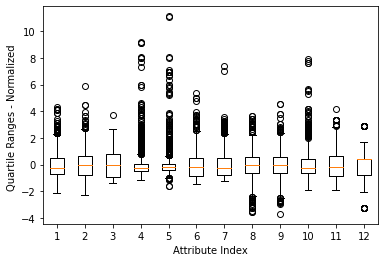

In [6]:
for i in range(ncols):
    mean = summary.iloc[1, i] 
    sd = summary.iloc[2, i]
    wineNormalized.iloc[:,i] = (wineNormalized.iloc[:,i] - mean) / sd
array = wineNormalized.values
boxplot(array)
plot.xlabel("Attribute Index") 
plot.ylabel(("Quartile Ranges - Normalized ")) 
show()

All the values are normalized in this box plot. By looking at the plot above, we can clerly see that there are some outliers visualized for each column. 

## 2. Parallel Coordinate Plot for Wine data

In [7]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,-0.787576
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594,-0.787576
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594,-0.787576
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594,0.450707
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,-0.787576


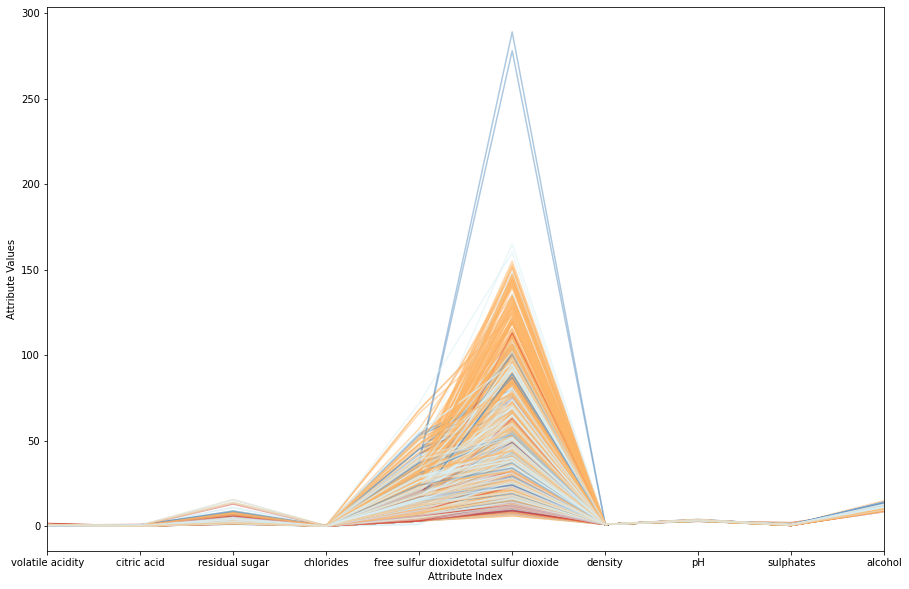

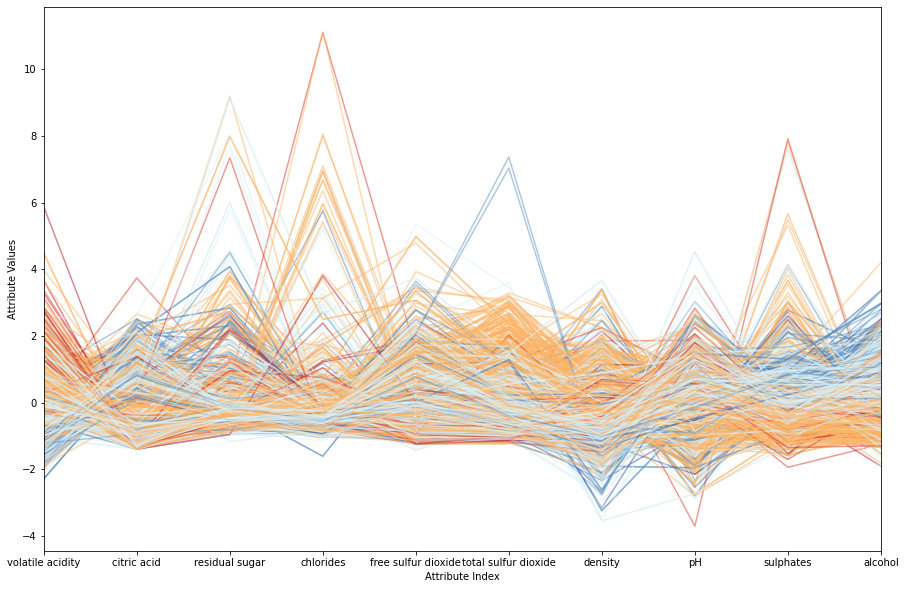

In [8]:
plot.figure(figsize=(15,10)) 
wine = pd.read_csv(target_url,header=0, sep=";")
nrows = len(wine.index)
tasteCol = len(summary.columns) 
meanTaste = summary.iloc[1,tasteCol - 1] 
sdTaste = summary.iloc[2,tasteCol - 1] 
nDataCol = len(wine.columns) -1
for i in range(nrows):
#plot rows of data as if they were series data
    dataRow = wine.iloc[i,1:nDataCol]
    normTarget = (wine.iloc[i,nDataCol] - meanTaste)/sdTaste 
    labelColor = 1.0/(1.0 + exp(-normTarget))
    dataRow.plot(color=plot.cm.RdYlBu(labelColor), alpha=0.5)
#     dataRow.plot(color=plot.cm.RdYlBu(normTarget), alpha=0.5)  
plot.xlabel("Attribute Index") 
plot.ylabel(("Attribute Values")) 
plot.show()


plot.figure(figsize=(15,10))
#Try again with normalized values
wineNormalized = wine
ncols = len(wineNormalized.columns)
for i in range(ncols):
    mean = summary.iloc[1, i] 
    sd = summary.iloc[2, i]
    wineNormalized.iloc[:,i] = (wineNormalized.iloc[:,i] - mean) / sd
    
for i in range(nrows):
#plot rows of data as if they were series data
    dataRow = wineNormalized.iloc[i,1:nDataCol]
    normTarget = wineNormalized.iloc[i,nDataCol]
    labelColor = 1.0/(1.0 + exp(-normTarget)) 
    dataRow.plot(color=plot.cm.RdYlBu(labelColor), alpha=0.5)
#     dataRow.plot(color=plot.cm.RdYlBu(normTarget), alpha=0.5)
plot.xlabel("Attribute Index") 
plot.ylabel(("Attribute Values")) 
plot.show()

 

The first plot is a parallel coordinate plot without being normalized. We can see the color scale ranges from yellow, red and blue, which indicates the minimum and maximum values are widely seperated from a large scale of data. However, some data are compressed because the ranges of values vary from different columns. 

To address this problem, we can produce a second parallel coordinate plot by normalizing the data, as it is shown in the second figure above. We can intuitively get a general view of what is the relationship between the targets and attributes. Wine with better taste(the blue-ish lines) usually contains more alcohol and sulfer dioxide. On the contrary, those low-quality wine has more chlorides and sulphates.

## 3. Correlation Heat Map

                      volatile acidity  citric acid  residual sugar  \
volatile acidity              1.000000    -0.552496        0.001918   
citric acid                  -0.552496     1.000000        0.143577   
residual sugar                0.001918     0.143577        1.000000   
chlorides                     0.061298     0.203823        0.055610   
free sulfur dioxide          -0.010504    -0.060978        0.187049   
total sulfur dioxide          0.076470     0.035533        0.203028   
density                       0.022026     0.364947        0.355283   
pH                            0.234937    -0.541904       -0.085652   
sulphates                    -0.260987     0.312770        0.005527   
alcohol                      -0.202288     0.109903        0.042075   

                      chlorides  free sulfur dioxide  total sulfur dioxide  \
volatile acidity       0.061298            -0.010504              0.076470   
citric acid            0.203823            -0.060978          

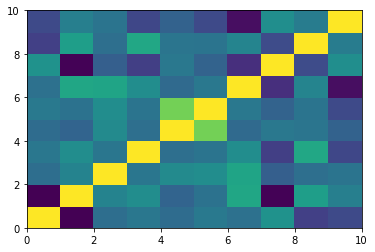

In [9]:
#calculate correlation matrix
corMat = DataFrame(wine.iloc[:,1:nDataCol].corr()) #print correlation matrix
print(corMat)
#visualize correlations using heatmap 
plot.pcolor(corMat)
plot.show()

The heat map shows the correlations between different attibutes and other attribute. Lighter colors indicate heigher correlations. 